## Cargar librerías

In [217]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

## Cargar datset limpio "datos_london2.csv"

In [218]:
# Cargar el archivo CSV en un DataFrame
df_london2 = pd.read_csv(r'C:\Users\Administrator\Documents\ProyectoAirBnB\airbnb_grupo1\data\data_limpia\datos_london2.csv')

# Mostrar las primeras filas del DataFrame para verificar la carga
print(df_london2.head())

num_filas = df_london2.shape[0]
print("Número de filas en el dataset:", num_filas)


      id                                               name  host_id  \
0  11551         Arty and Bright London Apartment in Zone 2    43039   
1  13913                Holiday London DB Room Let-on going    54730   
2  90700                  Sunny Notting Hill flat & terrace   491286   
3  15400                Bright Chelsea  Apartment. Chelsea!    60302   
4  92399  MODERN SELF CONTAINED ARCHITECT FLATLET, ISLIN...   497366   

       host_name           neighbourhood  latitude  longitude  \
0        Adriano                 Lambeth  51.46225   -0.11732   
1          Alina               Islington  51.56802   -0.11121   
2           Chil  Kensington and Chelsea  51.51074   -0.19853   
3       Philippa  Kensington and Chelsea  51.48796   -0.16898   
4  Andrea & Mark               Islington  51.55071   -0.08547   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0  Entire home/apt     88               3                185  2019-09-15   
1     Private room     6

# Calcular estadísticas descriptivas para las columnas numéricas

In [219]:
# Calcular estadísticas descriptivas para las columnas numéricas
estadisticas = df_london2[['price', 'minimum_nights', 'number_of_reviews']].describe()
print(estadisticas)


              price  minimum_nights  number_of_reviews
count  85030.000000    85030.000000       85030.000000
mean     122.357109        4.147854          17.475550
std      220.785186       16.682753          36.789372
min        0.000000        1.000000           0.000000
25%       47.000000        1.000000           1.000000
50%       84.000000        2.000000           4.000000
75%      140.000000        3.000000          17.000000
max    12345.000000     1125.000000         716.000000


## Borrar outliers de la columna minimun_nights

In [220]:
# Calcular los cuartiles
Q1 = df_london2['minimum_nights'].quantile(0.25)
Q3 = df_london2['minimum_nights'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR


# Identificar filas con outliers
outliers = df_london2[(df_london2['minimum_nights'] < limite_inferior) | 
                       (df_london2['minimum_nights'] > limite_superior)]


# Eliminar filas con outliers
df_london2_cleaned = df_london2[~df_london2.index.isin(outliers.index)]

# Verificar el número de filas antes y después
print("Número de filas antes de eliminar outliers:", df_london2.shape[0])
print("Número de filas después de eliminar outliers:", df_london2_cleaned.shape[0])


Número de filas antes de eliminar outliers: 85030
Número de filas después de eliminar outliers: 77442


# Estadisticas descriptivas nuevamente para ver el impacto de eliminar outliers de la columna minimun_nights

In [221]:
# Calcular estadísticas descriptivas para las columnas numéricas
estadisticas = df_london2_cleaned[['price', 'minimum_nights', 'number_of_reviews']].describe()
print(estadisticas)

              price  minimum_nights  number_of_reviews
count  77442.000000    77442.000000       77442.000000
mean     121.070504        2.158609          18.534516
std      215.763111        1.228447          37.989584
min        0.000000        1.000000           0.000000
25%       48.000000        1.000000           1.000000
50%       83.000000        2.000000           5.000000
75%      139.000000        3.000000          19.000000
max    12345.000000        6.000000         716.000000


## Sustituir ceros en la columna price con la media

In [222]:
# Crear una copia del DataFrame
df_london2_cleaned_copy = df_london2_cleaned.copy()

# Asegurarse de que la columna 'price' sea de tipo float
df_london2_cleaned_copy['price'] = df_london2_cleaned_copy['price'].astype(float)

# Calcular la media de la columna 'price' (excluyendo los ceros)
media_price = df_london2_cleaned_copy[df_london2_cleaned_copy['price'] != 0]['price'].mean()

# Sustituir los valores de cero por la media utilizando .loc[]
df_london2_cleaned_copy.loc[df_london2_cleaned_copy['price'] == 0, 'price'] = media_price




## Nuevamente estadísticas descriptivas

In [223]:
# Calcular estadísticas descriptivas para las columnas numéricas
estadisticas = df_london2_cleaned_copy[['price', 'minimum_nights', 'number_of_reviews']].describe()
print(estadisticas)

              price  minimum_nights  number_of_reviews
count  77442.000000    77442.000000       77442.000000
mean     121.098652        2.158609          18.534516
std      215.755213        1.228447          37.989584
min        1.000000        1.000000           0.000000
25%       48.000000        1.000000           1.000000
50%       84.000000        2.000000           5.000000
75%      139.000000        3.000000          19.000000
max    12345.000000        6.000000         716.000000


## Visualizar outliers de price

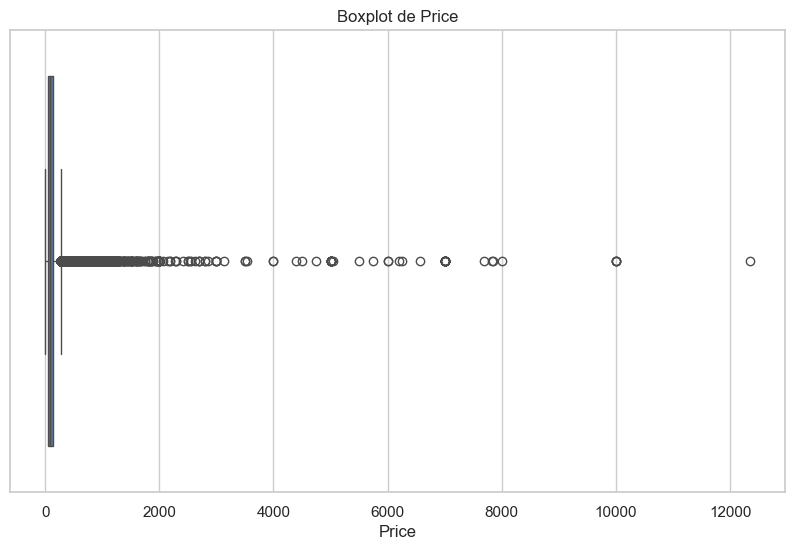

In [224]:


# Establecer el estilo de la visualización
sns.set(style="whitegrid")

# Crear un boxplot de 'price'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_london2_cleaned_copy['price'])
plt.title('Boxplot de Price')
plt.xlabel('Price')
plt.show()


## Distribución de precios por tipo de habitación y barrio
Este gráfico ayudará a ver cómo se distribuyen los precios y si hay diferencias notables entre barrios y tipos de habitaciones.

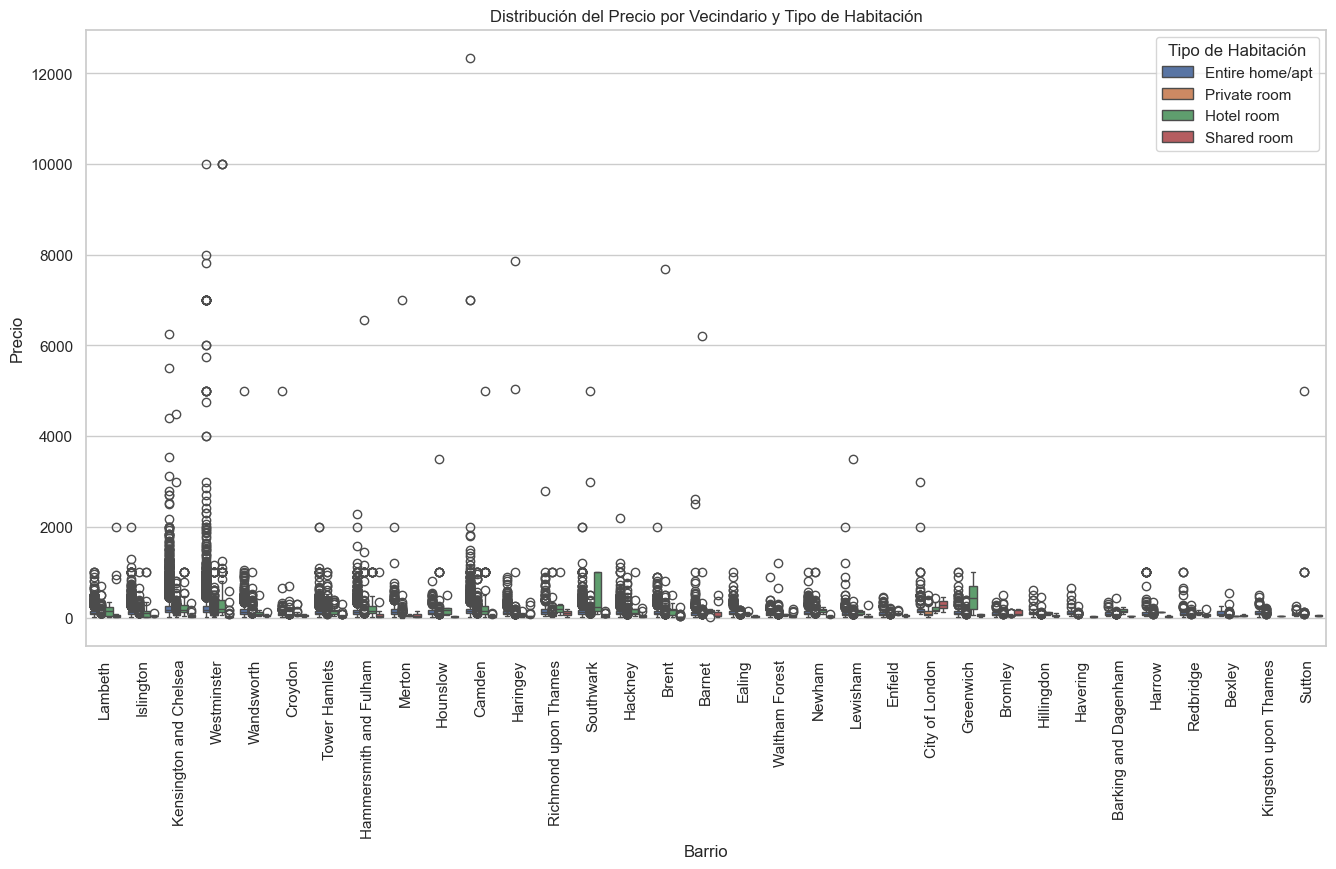

In [225]:

plt.figure(figsize=(16, 8))
sns.boxplot(data=df_london2_cleaned_copy, x='neighbourhood', y='price', hue='room_type')
plt.title("Distribución del Precio por Vecindario y Tipo de Habitación")
plt.xlabel("Barrio")
plt.ylabel("Precio")
plt.xticks(rotation=90)
plt.legend(title='Tipo de Habitación')
plt.show()




## Gráfica scatter de precio promedio por vecindario

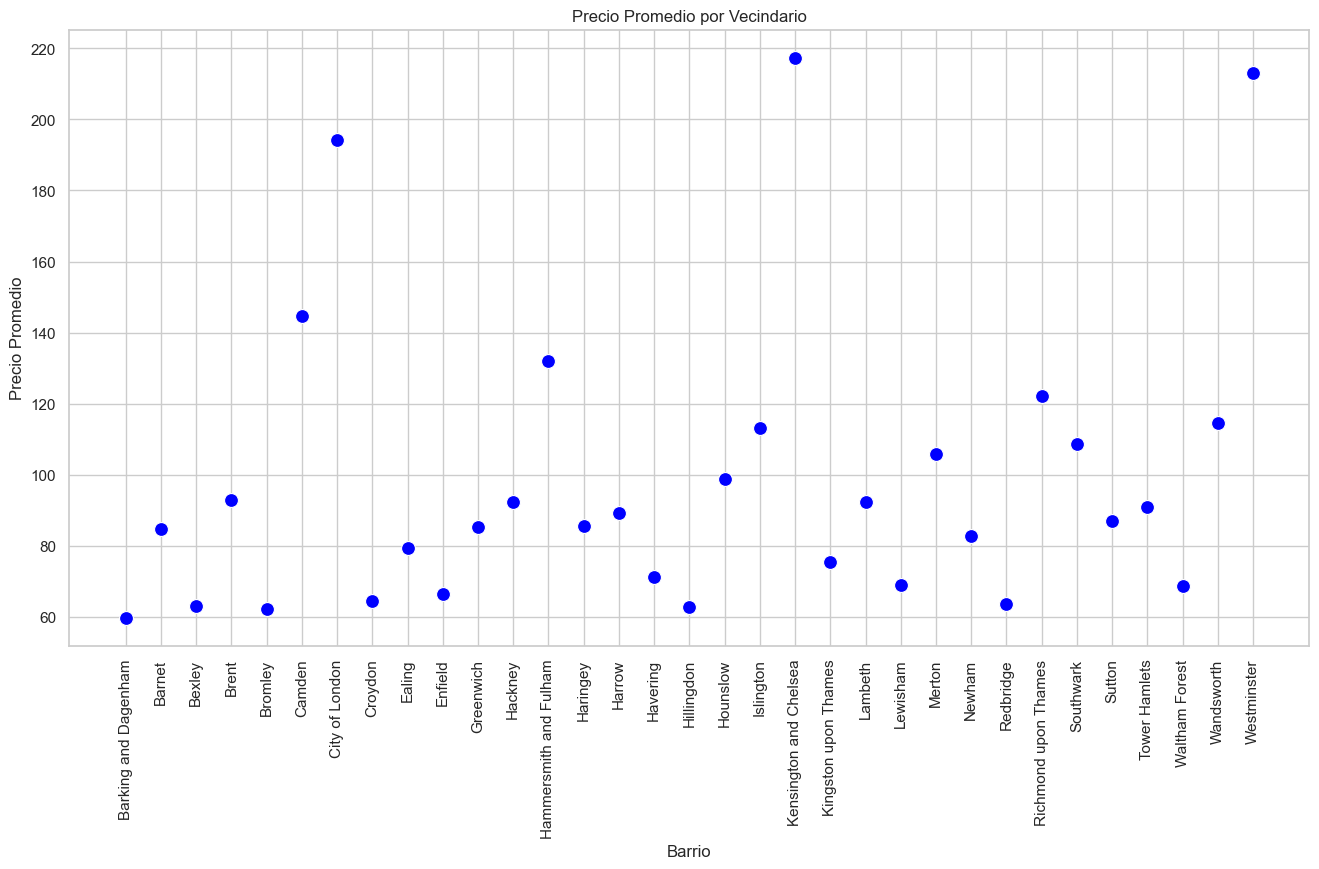

In [226]:
# Calcular el precio promedio por vecindario
average_price_per_neighbourhood = df_london2_cleaned_copy.groupby('neighbourhood')['price'].mean().reset_index()

# Crear el scatter plot
plt.figure(figsize=(16, 8))
sns.scatterplot(data=average_price_per_neighbourhood, x='neighbourhood', y='price', color='blue', s=100)
plt.title("Precio Promedio por Vecindario")
plt.xlabel("Barrio")
plt.ylabel("Precio Promedio")
plt.xticks(rotation=90)  # Rotar etiquetas del eje X para facilitar la lectura

plt.show()



## Gráfica del precio promedio por tipo de alojamiento

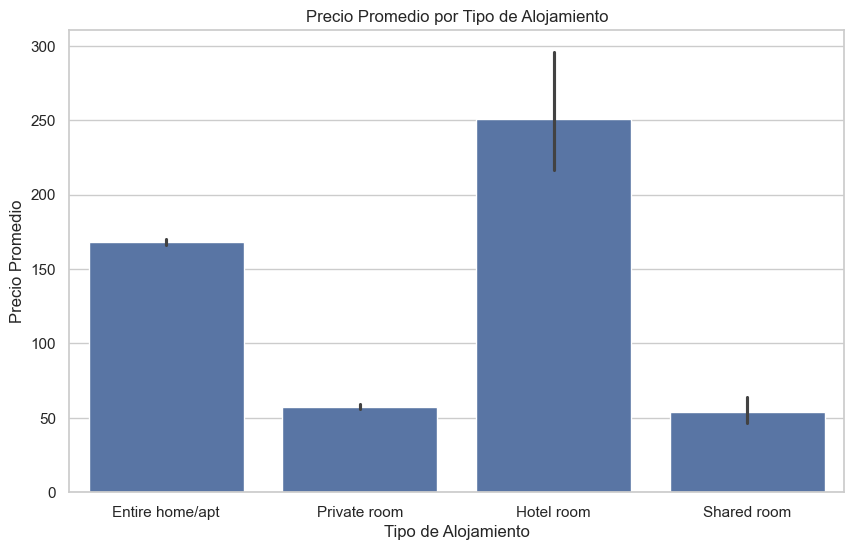

In [227]:

# Configuración del tamaño del gráfico
plt.figure(figsize=(10, 6))

# Gráfico de barras: Precio promedio por tipo de alojamiento
sns.barplot(data=df_london2_cleaned_copy, x='room_type', y='price', estimator='mean')
plt.title("Precio Promedio por Tipo de Alojamiento")
plt.xlabel("Tipo de Alojamiento")
plt.ylabel("Precio Promedio")

plt.show()



## Cantidad de propiedades vs el tipo de propiedades

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2448\1288835605.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=alojamientos_df, x='room_type', y='count', palette=colores)


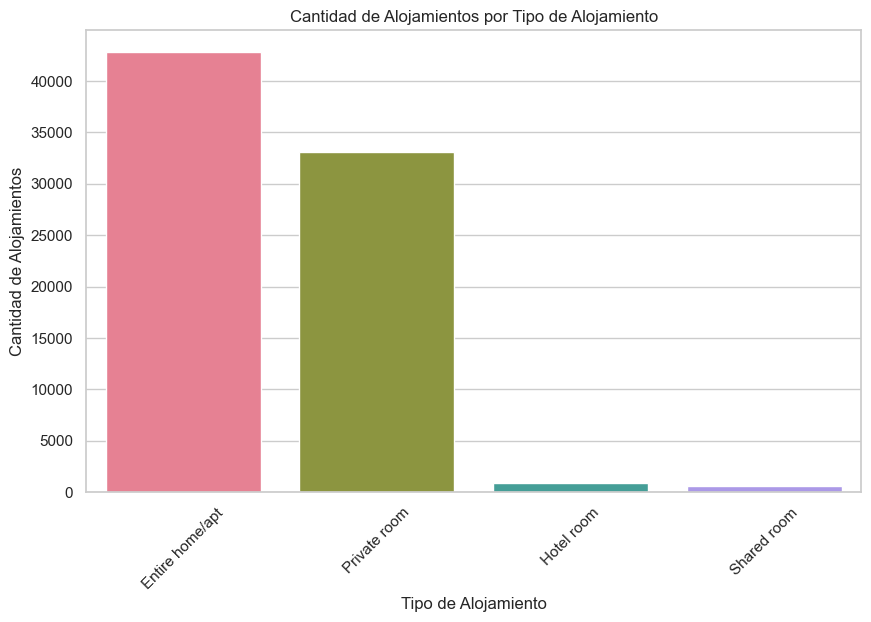

In [228]:
# Suponiendo que df_london2_cleaned_copy ya está definido
# Agrupar por tipo de alojamiento y contar la cantidad
alojamientos_count = df_london2_cleaned_copy['room_type'].value_counts()

# Crear un DataFrame a partir del conteo
alojamientos_df = alojamientos_count.reset_index()
alojamientos_df.columns = ['room_type', 'count']  # Renombrar columnas

# Crear una lista de colores
colores = sns.color_palette("husl", len(alojamientos_df))  # Paleta de colores

# Crear un gráfico de barras con colores diferentes
plt.figure(figsize=(10, 6))
sns.barplot(data=alojamientos_df, x='room_type', y='count', palette=colores)

# Agregar títulos y etiquetas
plt.title('Cantidad de Alojamientos por Tipo de Alojamiento')
plt.xlabel('Tipo de Alojamiento')
plt.ylabel('Cantidad de Alojamientos')

# Mostrar el gráfico
plt.xticks(rotation=45)
plt.show()




## Mapa de calor de las propiedades en un mapa

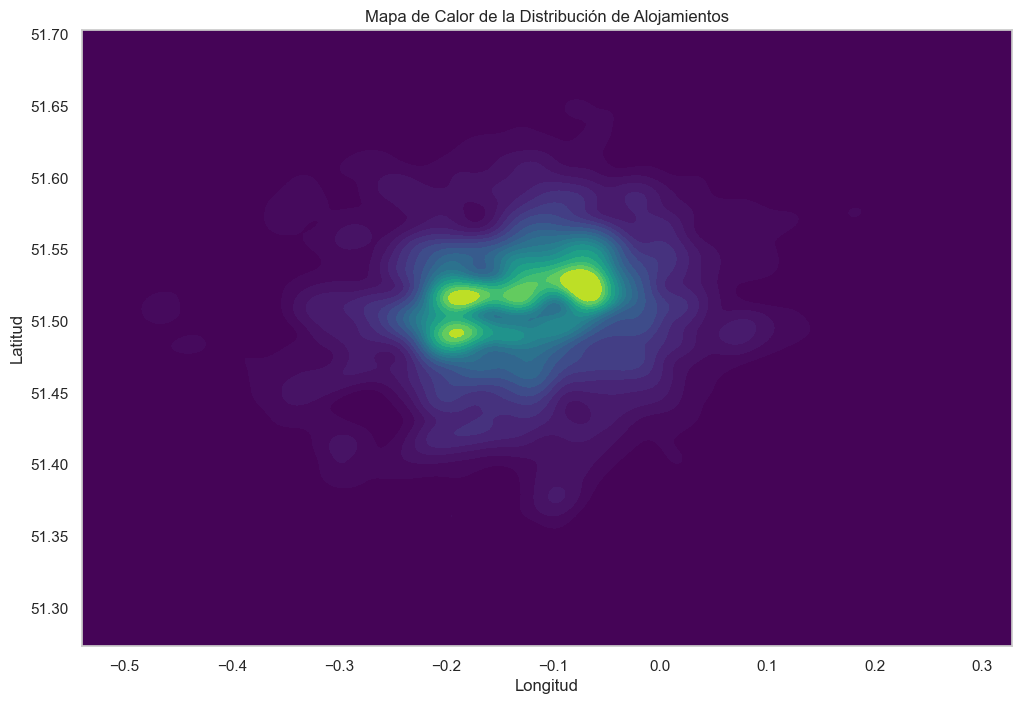

In [229]:
# Mapa de calor de la distribución de precios
plt.figure(figsize=(12, 8))
sns.kdeplot(data=df_london2_cleaned_copy, x='longitude', y='latitude', 
            cmap='viridis', fill=True, thresh=0, levels=20)
plt.title("Mapa de Calor de la Distribución de Alojamientos")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()


## Visualizar la ubicación de las propiedades en un mapa

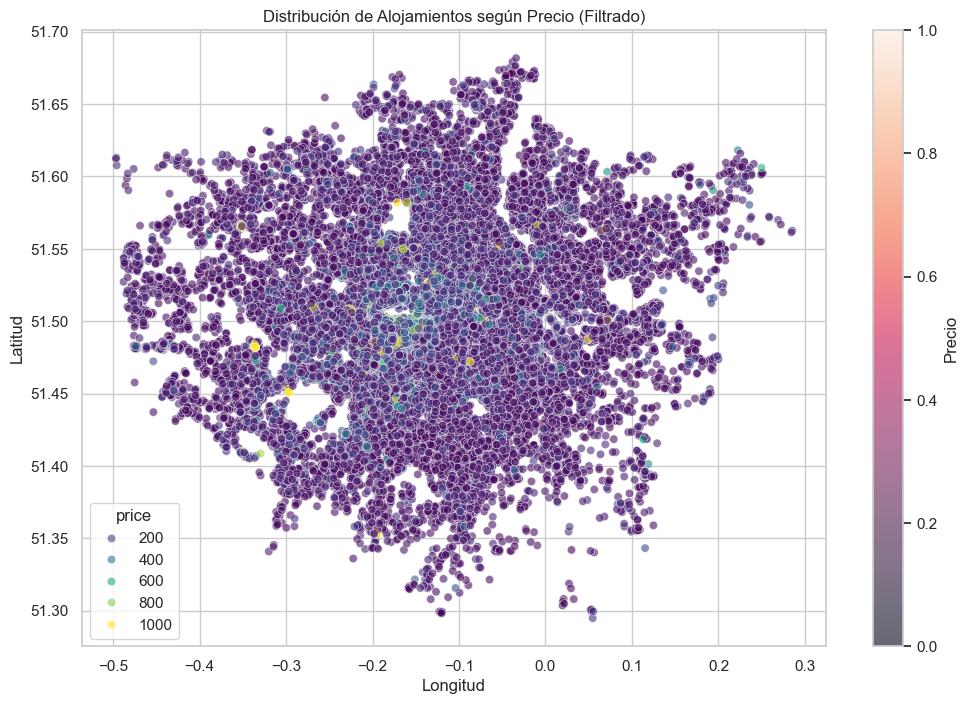

In [230]:
# Filtrar los precios para eliminar outliers (por ejemplo, precios mayores a 1000)
df_filtered = df_london2_cleaned_copy[df_london2_cleaned_copy['price'] <= 1000]

# Configuración del tamaño del gráfico
plt.figure(figsize=(12, 8))

# Gráfico de dispersión: Ubicación (latitud y longitud) y precio
scatter = sns.scatterplot(data=df_filtered, x='longitude', y='latitude', 
                          hue='price', palette='viridis', alpha=0.6, sizes=(20, 200))

# Agregar etiquetas y título
plt.title("Distribución de Alojamientos según Precio (Filtrado)")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.colorbar(scatter.collections[0], label='Precio')  # Agregar barra de color

plt.show()



In [231]:
# Calcular estadísticas descriptivas para las columnas numéricas
estadisticas = df_london2_cleaned_copy[['price', 'minimum_nights', 'number_of_reviews']].describe()
print(estadisticas)

              price  minimum_nights  number_of_reviews
count  77442.000000    77442.000000       77442.000000
mean     121.098652        2.158609          18.534516
std      215.755213        1.228447          37.989584
min        1.000000        1.000000           0.000000
25%       48.000000        1.000000           1.000000
50%       84.000000        2.000000           5.000000
75%      139.000000        3.000000          19.000000
max    12345.000000        6.000000         716.000000


In [232]:
# Crear un mapa centrado en una ubicación específica
map_center = [df_london2_cleaned_copy['latitude'].mean(), df_london2_cleaned_copy['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=12)

# Agregar propiedades al mapa
for i in range(len(df_london2_cleaned_copy)):
    folium.CircleMarker(
        location=(df_london2_cleaned_copy.iloc[i]['latitude'], df_london2_cleaned_copy.iloc[i]['longitude']),
        radius=5,
        color='blue',
        fill=True,
        fill_opacity=0.6,
        popup=f"Precio: {df_london2_cleaned_copy.iloc[i]['price']}"
    ).add_to(m)

# Mostrar el mapa
m.save("mapa_propiedades.html")
